# 4.2.2 Capstone Analytic Report and Research Proposal

By RMM

## Abstract

This report describes a dataset concerning subjects with and without diabetes. We analize factors that cause this metabolic disorder and considering our data we'll determine possible solutions to prevent it.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr
from IPython.display import HTML
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Dataset description

__Original Owner:__ National Institute of Diabetes and Digestive and Kidney Diseases

__Source:__ https://www.kaggle.com/uciml/pima-indians-diabetes-database

__Dataset Information:__ The population for this study was the Pima Indian population near Phoenix, Arizona. That population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes. Each community resident over 5 years of age was asked to undergo a standardized examination every two years, which included an oral glucose tolerance test. Diabetes was diagnosed according to World Health Organization Criteria; that is, if the 2 hour post-load plasma glucose was at least 200 mg/dl (11.1 mmol/l) at any survey examination or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.

__Case Selection:__ Diabetes was defined as a plasma glucose concentration greater the 200 mg/dl two hours following the ingestion of 75 gm of a carbohydrate solution. Cases were drawn from the pool of examinations which met the following criteria:

1. The subject was female.

2. The subject was >= 21 year of age at the time of the index examination. An index examination refers to the study that was chosen for use in this model. It does not necessarily correspond to the chronologically first examination for this subject.

3. Only one examination was selected per subject. That examination was one that revealed a nondiabetic GTT and met one of the following two criteria:

    a. Diabetes was diagnosed within five years of the examination, OR

    b. A GTT performed five or more years later failed to eveal diabetes mellitus.
    
4. If diabetes occurred within one year of an examination, that examination was excluded from the study to remove from the forecasting model those cases that were potentially easier to forecast. In 75% of the excluded examinations, DM was diagnosed within six months. Using these criteria, 768 examinations were selected.

__Attribute Information:__

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mg/dL)
3. Diastolic blood pressure (mm/Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

## Description of numerical variables

In [3]:
data = pd.read_csv('diabetes.csv')

__Values Description:__ 

* All the data in the set is numerical.
* Every attribute count is 768, meaning that there are no null values.
* Means osccilate between 0.3 and 121, with a broad difference in standard deviations, oscillating from 0.3 to 115.
* Almost all atributes have minimum values of zero. This my indicate that some attributes have a null value replaced by a zero.

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Significant data

This dataset reflects the presence of diabetes in a given community with a series of attributes that reflect the presence and not of diabetes. It is important to visualize the relationship between this attributes to better understand what happens in this population.

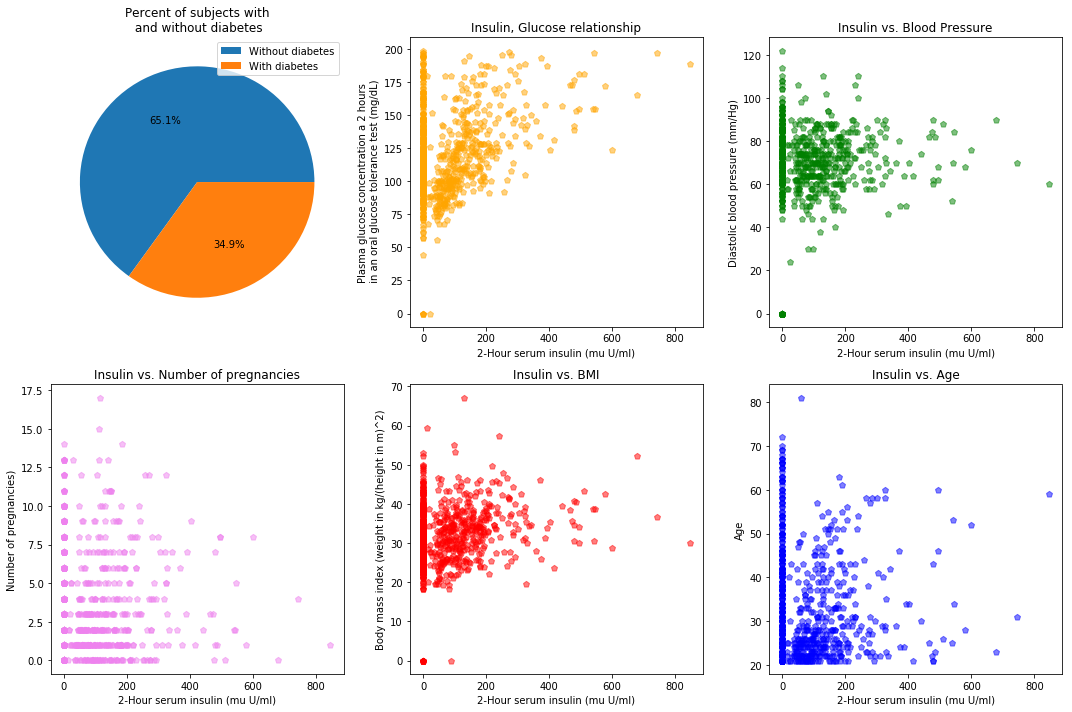

In [5]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.pie(data.Outcome.value_counts(), autopct='%1.1f%%')
plt.legend(['Without diabetes', 'With diabetes'], loc='best')
plt.title('Percent of subjects with\n and without diabetes')

plt.subplot(2, 3, 2)
plt.scatter(data.Insulin, data.Glucose, s=40, c='orange', marker='p', norm=True, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Plasma glucose concentration a 2 hours\n in an oral glucose tolerance test (mg/dL)')
plt.title('Insulin, Glucose relationship')

plt.subplot(2, 3, 3)
plt.scatter(data.Insulin, data.BloodPressure,s=40, c='g', marker='p', norm=True, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Diastolic blood pressure (mm/Hg)')
plt.title('Insulin vs. Blood Pressure')

plt.subplot(2, 3, 4)
plt.scatter(data.Insulin, data.Pregnancies, s=40, c='violet', marker='p', norm=False, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Number of pregnancies)')
plt.title('Insulin vs. Number of pregnancies')

plt.subplot(2, 3, 5)
plt.scatter(data.Insulin, data.BMI, s=40, c='red', marker='p', norm=False, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Body mass index (weight in kg/(height in m)^2)')
plt.title('Insulin vs. BMI')

plt.subplot(2, 3, 6)
plt.scatter(data.Insulin, data.Age, s=40, c='blue', marker='p', norm=False, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Age')
plt.title('Insulin vs. Age')

plt.tight_layout()

In the above visualizations we can see that:

* more than a third of the surveyed popultion has diabetes,
* as expected a low volume of insulin is proportional to a high volume of glucose,
* low and high volume of insulin range in the same blood prerssure,
* a lower level of insulin is reflected among subjects with a higher number of pregnancies,
* as in relation with the blood pressure, the relation of insulin and BMI reflect that the range is similar for all volumes,
* the precense of a low volume of insulin is predominant amog lower age groups.

## Subject's background data

In [6]:
is_positive = data.Outcome == 1
is_negative = data.Outcome == 0

In [7]:
print('The following describes statistics regarding subjects with diabetes:')
data[is_positive].describe()

The following describes statistics regarding subjects with diabetes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [8]:
print('The following describes statistics regarding subjects without diabetes:')
data[is_negative].describe()

The following describes statistics regarding subjects without diabetes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


Evaluating the description based on subjects with diabetes and subjects without diabetes, we can drive several conclusions:

* The total number of subjects with diabetes is 268, and without diabetes 500.
* The mean pregancies in both situations is slightly different. Those subjects with diabetes have an average of 2 more children than those who don't have diabetes.
* The glucose parameter shows that those persons with diabetes have an average of 141 mg/dL in contrast with those who don't have, that have 110 mg/dL.
* Blood pressure, skin thikness, BMI and the diabetes pedefgree function, show similar values in both situations.
* Insuline does show a difference of 32 Uh/ml, with a higher insulin value concerning in the the group with diabetes.
* The mean age of those subjects with diabetes is 37, and 31 is the mean age for those subjects without diabetes.

__Background data's visualiztion:__

The number of subjects with diabetes are 268.
The number of subjects without diabetes are 500.


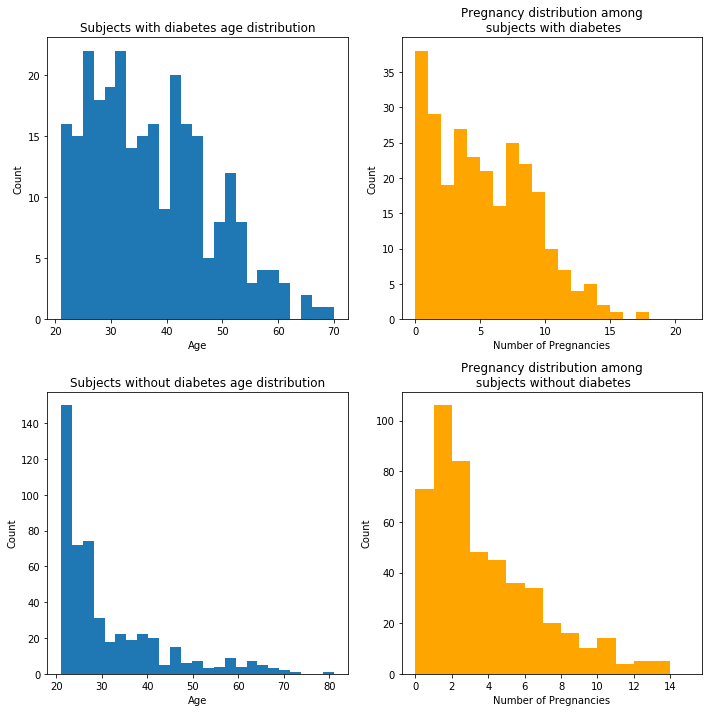

In [9]:
print('The number of subjects with diabetes are {}.'.format(len(data.loc[data.Outcome==1])))
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.hist(data.loc[data.Outcome==1,'Age'], bins=25)
plt.title("Subjects with diabetes age distribution")
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(data.loc[data.Outcome==1, 'Pregnancies'], bins=range(22), color='orange')
plt.title('Pregnancy distribution among\n subjects with diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

print('The number of subjects without diabetes are {}.'.format(len(data.loc[data.Outcome==0])))

plt.subplot(2, 2, 3)
plt.hist(data.loc[data.Outcome==0,'Age'], bins=25)
plt.title("Subjects without diabetes age distribution")
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(data.loc[data.Outcome==0, 'Pregnancies'], bins=range(16), color='orange')
plt.title('Pregnancy distribution among\n subjects without diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')



plt.tight_layout()

## Analytic questions

### __Question 1: Considering isolatedly the value of number of pregnancies, does this relate directly in having diabetes?__

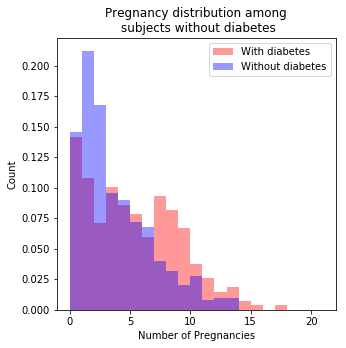

Number of pregnancies T-test: Ttest_indResult(statistic=5.9069614794974905, pvalue=6.8219256004571448e-09)


In [10]:
plt.figure(figsize=(5, 5))

plt.hist(data.loc[data.Outcome==1, 'Pregnancies'], bins=range(22), color='red', alpha=0.4, normed=True, label='With diabetes')
plt.hist(data.loc[data.Outcome==0, 'Pregnancies'], bins=range(22), color='blue', alpha=0.4, normed=True, label='Without diabetes')
plt.title('Pregnancy distribution among\n subjects without diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend()

plt.show()

print('Number of pregnancies T-test:', ttest_ind(data.loc[data.Outcome==1, 'Pregnancies'], data.loc[data.Outcome==0, 'Pregnancies'], equal_var=False))

__Answer to question 1:__ In the graph above we can see that among the population with diabetes, there are greater number of women having a high number of pregnancies. Calculating the p-value between both of these populations, we see that it is significanttly small (6.8219256004571448e-09), which confirms our latter affirmation. Hence, we can say that the prescence of the metabolic disorder among women is directly proportional to high number of pregnancies per subject.

### __Question 2: What factors are causing diabetes?__

To determine the factors that are causing diabetes concerning our dataset, I run T-tests for all attributes comparing the outcome of having diabete or not of each subject. Those results with a very small P-value help us determine that that attribute is involved in the precense or not of diabetes in the subject.

In [11]:
print('Blood pressure T-test:', ttest_ind(data.loc[data.Outcome==1, 'BloodPressure'], data.loc[data.Outcome==0, 'BloodPressure'], equal_var=False))
print('Skin thickness T-test:', ttest_ind(data.loc[data.Outcome==1, 'SkinThickness'], data.loc[data.Outcome==0, 'SkinThickness'], equal_var=False))
print('BMI T-test:', ttest_ind(data.loc[data.Outcome==1, 'BMI'], data.loc[data.Outcome==0, 'BMI'], equal_var=False))
print('Pregnancies T-test:', ttest_ind(data.loc[data.Outcome==1, 'Pregnancies'], data.loc[data.Outcome==0, 'Pregnancies'], equal_var=False))
print('Glucose T-test:', ttest_ind(data.loc[data.Outcome==1, 'Glucose'], data.loc[data.Outcome==0, 'Glucose'], equal_var=False))
print('Insulin T-test:', ttest_ind(data.loc[data.Outcome==1, 'Insulin'], data.loc[data.Outcome==0, 'Insulin'], equal_var=False))
print('Diabetes pedigree function T-test:', ttest_ind(data.loc[data.Outcome==1, 'DiabetesPedigreeFunction'], data.loc[data.Outcome==0, 'DiabetesPedigreeFunction'], equal_var=False))
print('Age T-test:', ttest_ind(data.loc[data.Outcome==1, 'Age'], data.loc[data.Outcome==0, 'Age'], equal_var=False))

Blood pressure T-test: Ttest_indResult(statistic=1.7130865949770784, pvalue=0.087354248214615779)
Skin thickness T-test: Ttest_indResult(statistic=1.9705792220450487, pvalue=0.049355860086480192)
BMI T-test: Ttest_indResult(statistic=8.6193168813579462, pvalue=6.5662376247083305e-17)
Pregnancies T-test: Ttest_indResult(statistic=5.9069614794974905, pvalue=6.8219256004571448e-09)
Glucose T-test: Ttest_indResult(statistic=13.751537067396411, pvalue=2.6441613495403223e-36)
Insulin T-test: Ttest_indResult(statistic=3.3008947714793337, pvalue=0.0010469286528313425)
Diabetes pedigree function T-test: Ttest_indResult(statistic=4.5768120082912782, pvalue=6.1004814242403259e-06)
Age T-test: Ttest_indResult(statistic=6.9207383789880401, pvalue=1.2015125273113395e-11)


Given the above results, a plot of those compromised attributes, help us visualize how each attribute impacts in the correspondent segment.

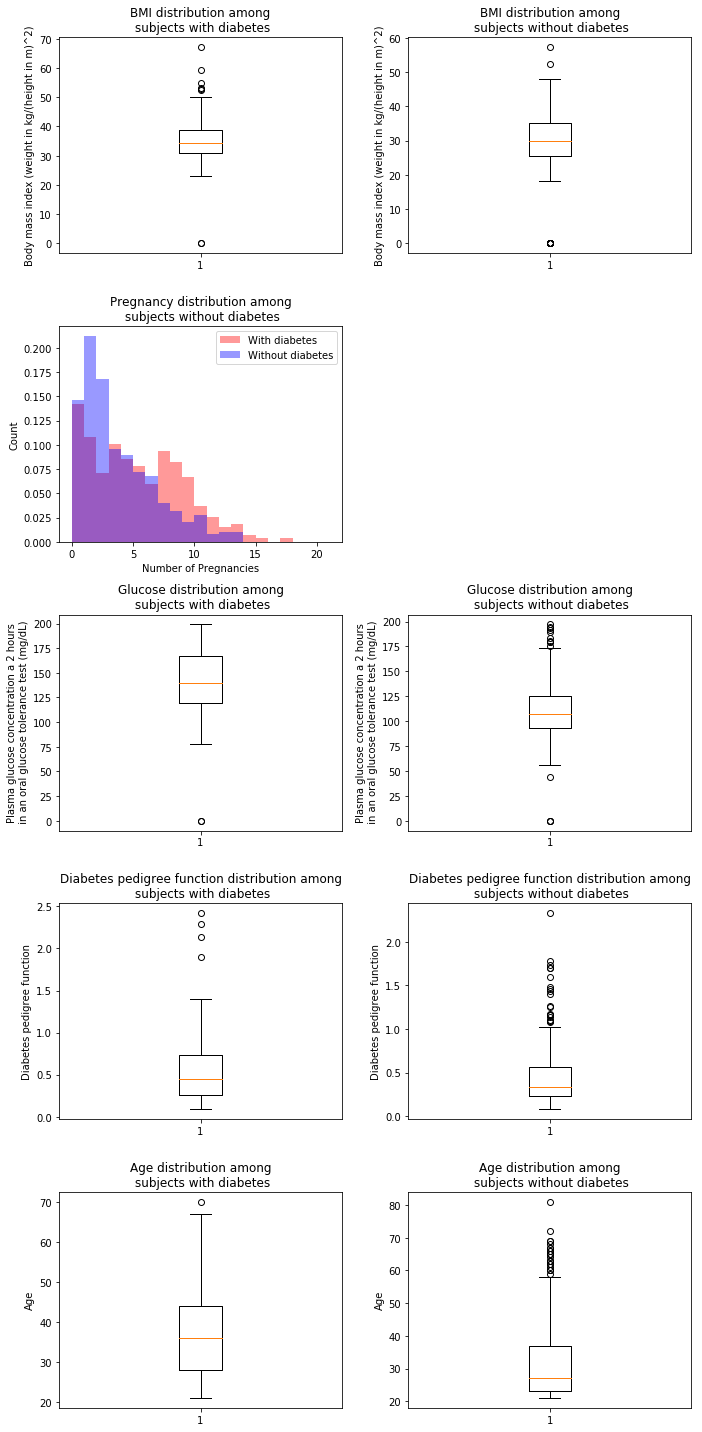

In [12]:
plt.figure(figsize=(10, 20))

plt.subplot(5, 2, 1)
plt.boxplot(data.loc[data.Outcome==1, 'BMI'])
plt.title('BMI distribution among\n subjects with diabetes')
plt.ylabel('Body mass index (weight in kg/(height in m)^2)')

plt.subplot(5, 2, 2)
plt.boxplot(data.loc[data.Outcome==0, 'BMI'])
plt.title('BMI distribution among\n subjects without diabetes')
plt.ylabel('Body mass index (weight in kg/(height in m)^2)')

plt.subplot(5,2,3)
plt.hist(data.loc[data.Outcome==1, 'Pregnancies'], bins=range(22), color='red', alpha=0.4, normed=True, label='With diabetes')
plt.hist(data.loc[data.Outcome==0, 'Pregnancies'], bins=range(22), color='blue', alpha=0.4, normed=True, label='Without diabetes')
plt.title('Pregnancy distribution among\n subjects without diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend()

plt.subplot(5, 2, 5)
plt.boxplot(data.loc[data.Outcome==1, 'Glucose'])
plt.title('Glucose distribution among\n subjects with diabetes')
plt.ylabel('Plasma glucose concentration a 2 hours\n in an oral glucose tolerance test (mg/dL)')

plt.subplot(5, 2, 6)
plt.boxplot(data.loc[data.Outcome==0, 'Glucose'])
plt.title('Glucose distribution among\n subjects without diabetes')
plt.ylabel('Plasma glucose concentration a 2 hours\n in an oral glucose tolerance test (mg/dL)')

plt.subplot(5, 2, 7)
plt.boxplot(data.loc[data.Outcome==1, 'DiabetesPedigreeFunction'])
plt.title('Diabetes pedigree function distribution among\n subjects with diabetes')
plt.ylabel('Diabetes pedigree function')

plt.subplot(5, 2, 8)
plt.boxplot(data.loc[data.Outcome==0, 'DiabetesPedigreeFunction'])
plt.title('Diabetes pedigree function distribution among\n subjects without diabetes')
plt.ylabel('Diabetes pedigree function')

plt.subplot(5, 2, 9)
plt.boxplot(data.loc[data.Outcome==1, 'Age'])
plt.title('Age distribution among\n subjects with diabetes')
plt.ylabel('Age')

plt.subplot(5, 2, 10)
plt.boxplot(data.loc[data.Outcome==0, 'Age'])
plt.title('Age distribution among\n subjects without diabetes')
plt.ylabel('Age')


plt.tight_layout()

__Answer to question 2:__ I compared the different attributes among the popullations that have and do not have diabetes by running T-tests and comparing visualizations. I determined that the following factors contribute to having diabetes:

* Age: a higher number of subjects reflect the presence of diabetes between 27 and 45 year. With a p-value of 1.2015125273113395e-11 I could confirm that this attribute is related to the presence of diabetes
* Number of pregnancies: I observed that diabetes was more present among subjects that had more pregnancies. The p-value for this attribute was of 6.8219256004571448e-09
* BMI: The visualization of the BMI attribute doesn’t show great significance, however, its p-value of 6.5662376247083305e-17 helps us determine that it’s role is important for considering the presence of diabetes
* Glucose: As expected, the presence of this disorder is directly proportional to the volume of glucose. The p-value for this attribute is 2.6441613495403223e-36 
* Diabetes pedegree function: the p-value for this attribute 6.1004814242403259e-06, helps us determine the significance of this attribute in the role it plays for confirming the the presence of diabetes in a subject

### __Question 3: What can one do to prevent diabetes?__

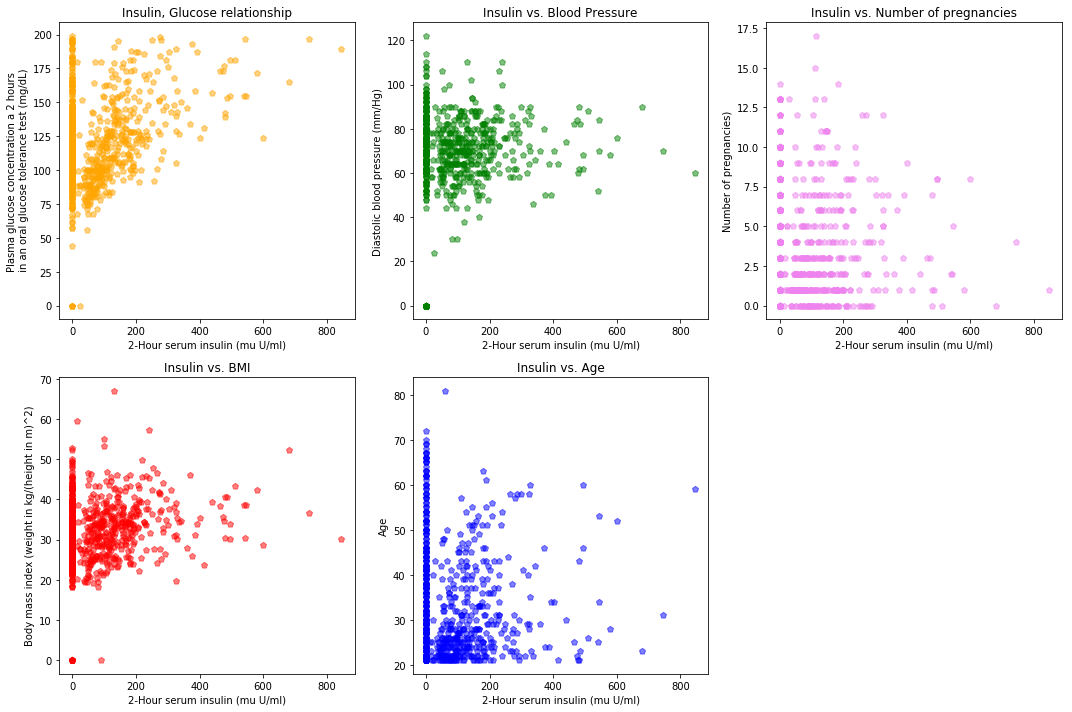

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(data.Insulin, data.Glucose, s=40, c='orange', marker='p', norm=True, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Plasma glucose concentration a 2 hours\n in an oral glucose tolerance test (mg/dL)')
plt.title('Insulin, Glucose relationship')

plt.subplot(2, 3, 2)
plt.scatter(data.Insulin, data.BloodPressure,s=40, c='g', marker='p', norm=True, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Diastolic blood pressure (mm/Hg)')
plt.title('Insulin vs. Blood Pressure')

plt.subplot(2, 3, 3)
plt.scatter(data.Insulin, data.Pregnancies, s=40, c='violet', marker='p', norm=False, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Number of pregnancies)')
plt.title('Insulin vs. Number of pregnancies')

plt.subplot(2, 3, 4)
plt.scatter(data.Insulin, data.BMI, s=40, c='red', marker='p', norm=False, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Body mass index (weight in kg/(height in m)^2)')
plt.title('Insulin vs. BMI')

plt.subplot(2, 3, 5)
plt.scatter(data.Insulin, data.Age, s=40, c='blue', marker='p', norm=False, alpha=0.5)
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Age')
plt.title('Insulin vs. Age')

plt.tight_layout()

__Answer to question 3:__ The relationship between diabetes and the low level of insulin is so close that the first factor we should keep an eye on to prevent having diabetes is what we eat. What we eat also contribute to our BMI which is key to having a healthy life, free of diabetes. Having a healthy life with balanced exercise and good sleep, undoubtedly will help in having a better body mass index, and thus, help to prevent diabetes too.  The next factor that contributes to this disorder for women, is the number of pregnancies, so, it is recommended to have a lower number of pregnancies to avoid diabetes issues.

## Proposed further research

Given this dataset, it would be interesting to combine all attributes and create a prediction model of recurrent neural neworks (RNN) such as LSTM with tensorflow. Thus, for the cases where the subject has no diabetes, predict if, given the information at the moment, there is a chance that diabetes could become present in her's or his body. Furthermore, it would be even more interesting if these results could be dermined given a live feed from for example a wearable watch that would be capable to obtain these kind of measurements. This would help the user in preventing to take wrong steps that could lead to having diabetes. Of course the latter would escape from the given dataset.